# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 35

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,6.046512,26,28.223252,4.3,4.667692,4.583269,4.564269,2.153046
560,Kelleher,Liverpool,45,2.000000,10,8.472317,5.0,4.236159,NaN,4.736850,1.996944
12,Martínez,Aston Villa,54,34.901961,178,155.365197,5.1,4.451475,3.512203,4.477443,1.915610
548,Mendy,Chelsea,52,28.750000,138,122.609599,4.8,4.264682,6.524918,4.161259,1.870187
523,Forster,Southampton,40,7.894737,30,29.524805,3.8,3.739809,4.109796,3.789286,1.869904
417,Johnstone,West Brom,46,34.102564,133,132.769870,3.9,3.893252,6.349960,3.743208,1.815238
326,Dubravka,Newcastle Utd,48,10.000000,34,39.316030,3.4,3.931603,3.821394,4.020891,1.794523
597,Sánchez,Brighton,46,24.250000,97,93.301310,4.0,3.847477,4.170362,3.633236,1.793895
213,Meslier,Leeds United,47,34.186047,147,132.931606,4.3,3.888476,3.920404,4.228605,1.793620


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.813539,7.0,5.203385,NaN,5.039184,2.480616
277,Cancelo,Manchester City,58,26.000000,130,135.652341,5.0,5.217398,4.019302,5.227963,2.166406
273,Stones,Manchester City,51,20.166667,121,96.333032,6.0,4.776845,2.481636,4.810970,2.115222
75,Bernardo,Brighton,39,2.941176,5,11.802827,1.7,4.012961,NaN,3.658809,2.032042
109,Rüdiger,Chelsea,47,16.938776,83,70.939551,4.9,4.187998,5.080685,4.075126,1.931779
123,James,Chelsea,51,30.277778,109,129.268588,3.6,4.269421,3.123376,4.137647,1.890532
104,Alonso,Chelsea,57,12.954545,57,58.195096,4.4,4.492253,3.588846,4.338290,1.881598
232,Chilwell,Chelsea,59,25.200000,126,113.767154,5.0,4.514570,5.748146,4.379969,1.858619
274,Mendy,Manchester City,59,11.923077,62,53.759865,5.2,4.508892,6.045162,4.570825,1.856281


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,56,25.892857,145,132.859738,5.6,5.131135,1.982937,4.993522,2.168300
301,Lingard,West Ham,66,13.055556,94,66.437759,7.2,5.088850,4.625591,5.172971,1.980832
570,Raphinha,Leeds United,54,27.045455,119,118.405109,4.4,4.378004,2.537021,4.719326,1.883993
272,De Bruyne,Manchester City,118,24.150943,128,152.898426,5.3,6.330950,NaN,6.120722,1.843011
24,Saka,Arsenal,51,30.000000,111,124.671223,3.7,4.155707,3.411012,4.110287,1.840178
302,Fernandes,Manchester Utd,115,35.820896,240,222.061075,6.7,6.199205,4.603150,6.186343,1.828046
37,Grealish,Aston Villa,75,22.807018,130,112.809623,5.7,4.946268,1.000000,4.721930,1.806122
105,Jorginho,Chelsea,47,26.000000,104,98.833910,4.0,3.801304,2.186137,3.715273,1.753411
390,Son,Tottenham,96,34.062500,218,183.191739,6.4,5.378106,5.867754,5.281943,1.735776


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,64,35.000000,175,167.039568,5.0,4.772559,3.442090,5.072491,1.886520
506,Wilson,Newcastle Utd,65,25.769231,134,122.631741,5.2,4.758844,3.800000,4.723392,1.866572
437,Antonio,West Ham,65,22.826087,105,106.159784,4.6,4.650810,5.400000,4.683735,1.824198
388,Kane,Tottenham,118,32.173913,222,201.575438,6.9,6.265183,4.925000,6.124867,1.823865
91,Wood,Burnley,64,30.000000,132,133.515870,4.4,4.450529,6.180672,4.750730,1.759226
514,Watkins,Aston Villa,65,33.777778,152,150.775654,4.5,4.463753,4.340945,4.227769,1.750828
164,Calvert-Lewin,Everton,76,30.000000,159,144.551741,5.3,4.818391,5.050000,4.694221,1.747814
224,Vardy,Leicester City,102,31.851852,172,172.027395,5.4,5.400860,4.050628,4.923843,1.691075
68,Maupay,Brighton,59,32.812500,105,129.463914,3.2,3.945567,3.220000,3.627441,1.624364


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,24.150943,128,152.898426,5.3,6.330950,6.120722,1.843011
388,Kane,Tottenham,118,32.173913,222,201.575438,6.9,6.265183,6.124867,1.823865
302,Fernandes,Manchester Utd,115,35.820896,240,222.061075,6.7,6.199205,6.186343,1.828046
254,Salah,Liverpool,127,34.193548,212,200.146946,6.2,5.853354,6.438832,1.642491
224,Vardy,Leicester City,102,31.851852,172,172.027395,5.4,5.400860,4.923843,1.691075
390,Son,Tottenham,96,34.062500,218,183.191739,6.4,5.378106,5.281943,1.735776
251,Mané,Liverpool,117,31.702128,149,166.924825,4.7,5.265414,5.792144,1.539358
277,Cancelo,Manchester City,58,26.000000,130,135.652341,5.0,5.217398,5.227963,2.166406
39,Hause,Aston Villa,44,4.000000,28,20.813539,7.0,5.203385,5.039184,2.480616


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.203385,NaN,5.880299,5.039184,2.480616
271,Gündogan,Manchester City,56,25.892857,5.6,5.131135,1.982937,5.237771,4.993522,2.168300
277,Cancelo,Manchester City,58,26.000000,5.0,5.217398,4.019302,5.483733,5.227963,2.166406
112,Arrizabalaga,Chelsea,47,6.046512,4.3,4.667692,4.583269,NaN,4.564269,2.153046
273,Stones,Manchester City,51,20.166667,6.0,4.776845,2.481636,5.036451,4.810970,2.115222
75,Bernardo,Brighton,39,2.941176,1.7,4.012961,NaN,4.116103,3.658809,2.032042
560,Kelleher,Liverpool,45,2.000000,5.0,4.236159,NaN,4.765197,4.736850,1.996944
301,Lingard,West Ham,66,13.055556,7.2,5.088850,4.625591,4.435102,5.172971,1.980832
109,Rüdiger,Chelsea,47,16.938776,4.9,4.187998,5.080685,NaN,4.075126,1.931779


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
388,Kane,Tottenham,118,32.173913,222,201.575438,6.9,6.265183,6.461991,6.124867,1.823865
233,Iheanacho,Leicester City,63,23.181818,102,90.603914,4.4,3.908404,6.233681,3.615859,1.557145
259,Alexander-Arnold,Liverpool,76,33.255814,143,156.753157,4.3,4.713556,6.135908,5.362293,1.709787
91,Wood,Burnley,64,30.000000,132,133.515870,4.4,4.450529,6.011069,4.750730,1.759226
573,Olsen,Everton,45,6.944444,25,24.484302,3.6,3.525739,6.001046,3.573357,1.662050
272,De Bruyne,Manchester City,118,24.150943,128,152.898426,5.3,6.330950,5.772871,6.120722,1.843011
245,Adrián,Liverpool,42,2.972973,11,10.675066,3.7,3.590704,5.730734,4.091395,1.752084
275,Mahrez,Manchester City,80,24.814815,134,120.890001,5.4,4.871687,5.658604,4.760231,1.722401
254,Salah,Liverpool,127,34.193548,212,200.146946,6.2,5.853354,5.587892,6.438832,1.642491


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
254,Salah,Liverpool,127,34.193548,212,200.146946,6.2,5.853354,6.573493,1.642491
272,De Bruyne,Manchester City,118,24.150943,128,152.898426,5.3,6.330950,6.458325,1.843011
388,Kane,Tottenham,118,32.173913,222,201.575438,6.9,6.265183,6.078752,1.823865
251,Mané,Liverpool,117,31.702128,149,166.924825,4.7,5.265414,5.910523,1.539358
39,Hause,Aston Villa,44,4.000000,28,20.813539,7.0,5.203385,5.880299,2.480616
164,Calvert-Lewin,Everton,76,30.000000,159,144.551741,5.3,4.818391,5.564063,1.747814
277,Cancelo,Manchester City,58,26.000000,130,135.652341,5.0,5.217398,5.483733,2.166406
259,Alexander-Arnold,Liverpool,76,33.255814,143,156.753157,4.3,4.713556,5.431671,1.709787
390,Son,Tottenham,96,34.062500,218,183.191739,6.4,5.378106,5.340854,1.735776


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,118,32.173913,6.9,6.265183,6.078752,1.823865,18.3,7.0,25.3,0.786351
254,Salah,Liverpool,127,34.193548,6.2,5.853354,6.573493,1.642491,18.1,5.0,23.1,0.675566
224,Vardy,Leicester City,102,31.851852,5.4,5.400860,NaN,1.691075,17.9,4.9,22.8,0.715814
202,Bamford,Leeds United,64,35.000000,5.0,4.772559,4.852260,1.886520,15.8,3.8,19.6,0.560000
302,Fernandes,Manchester Utd,115,35.820896,6.7,6.199205,NaN,1.828046,14.8,10.7,25.5,0.711875
514,Watkins,Aston Villa,65,33.777778,4.5,4.463753,4.588714,1.750828,14.8,3.4,18.2,0.538816
164,Calvert-Lewin,Everton,76,30.000000,5.3,4.818391,5.564063,1.747814,14.2,2.0,16.2,0.540000
251,Mané,Liverpool,117,31.702128,4.7,5.265414,5.910523,1.539358,13.6,5.0,18.6,0.586711
68,Maupay,Brighton,59,32.812500,3.2,3.945567,4.013904,1.624364,13.0,3.6,16.6,0.505905


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week32,assists_week33,assists_week34,assists_week35,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,...,xG_week3,xG_week30,xG_week31,xG_week32,xG_week33,xG_week34,xG_week35,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 32,xPoints week 33,xPoints week 34,xPoints week 35,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,95.293847,3.37499,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,9,497,100.0,100.0,34.30189,10,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.3,-0.1,5.147533,5.274923,1.8,3.426123,4.226279,3.931484,0.797316,2.443213,6.797316,7.248999,4.671518,4.963273,2.598274,4.404777,4.986388,1.986388,3.090127,1.0,2.489826,NaN,NaN,NaN,NaN,1.199148,1.443213,6.68128,3.626279,3.797316,NaN,5.147533,NaN,NaN,NaN,3.963273,3.461196,1.72834,2


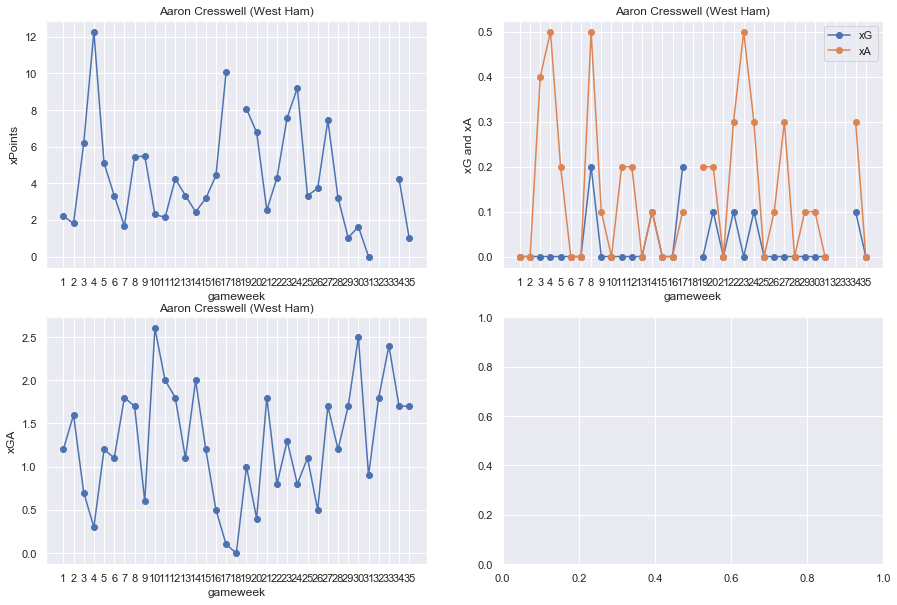

In [14]:
# find player index
name_string = 'Holding'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 435

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('Ihean'),'web_name']

id
233    Iheanacho
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,16,259,390,302,254,301,388,202,233] #vardy=224, grealish=37, mane=251
my_subs = [597,558,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 60.45886225434253
Expected points next gameweek: 44.31331220319229


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,34.901961,5.1,4.451475,3.512203,3.678774,5.027688,4.477443,1.915610
109,Rüdiger,Chelsea,47,16.938776,4.9,4.187998,5.080685,4.390744,NaN,4.075126,1.931779
16,Holding,Arsenal,43,28.235294,3.4,3.374990,3.850481,3.449270,NaN,3.635871,1.627565
259,Alexander-Arnold,Liverpool,76,33.255814,4.3,4.713556,6.152084,6.135908,5.431671,5.362293,1.709787
390,Son,Tottenham,96,34.062500,6.4,5.378106,5.867754,5.439699,5.340854,5.281943,1.735776
302,Fernandes,Manchester Utd,115,35.820896,6.7,6.199205,4.603150,4.703485,NaN,6.186343,1.828046
254,Salah,Liverpool,127,34.193548,6.2,5.853354,5.966712,5.587892,6.573493,6.438832,1.642491
301,Lingard,West Ham,66,13.055556,7.2,5.088850,4.625591,5.224938,4.435102,5.172971,1.980832
388,Kane,Tottenham,118,32.173913,6.9,6.265183,4.925000,6.461991,6.078752,6.124867,1.823865



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,46,24.250000,4.0,3.847477,4.170362,4.020014,3.920564,3.633236,1.793895
558,Coufal,West Ham,48,30.810811,3.7,3.833131,3.842331,3.563970,3.463800,4.056998,1.749577
23,Smith Rowe,Arsenal,42,18.157895,3.8,3.517732,4.523195,3.398481,NaN,3.515442,1.716477
74,White,Brighton,45,33.333333,3.0,3.227961,3.813623,3.578092,3.307346,2.984401,1.521676


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)